# BladeX

## Tutorial 3: Prepare a blade 3D sectional profiles

In this tutorial we show how to construct a blade 3D sectional profiles, where the planar foils undergo several transformation operation to satisfy the blade parameters `pitch`, `rake`, `skew`. In addition to that, we show the cylindrical transformations that are applied on such foils so that they resemble the blade cylindrical sections instead of the planar ones.

The foil transformations according to the pitch, rake, and skew are all given in the following transformations map.

<img src="data/transformations.png">


First of all we import from BladeX the `NacaProfile` class for generating the 2D sectional profiles, and we import the `Blade` class for the 3D blade generation.
We also import `numpy` and we set `matplotlib` for the notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from bladex import NacaProfile, Blade

We instantiate the object **sample_blade** of the `blade` class. The arguments are as follows:

1. `sections` which is an array_like of class objects from the `profiles` module. Each object represents a sectional profile and holds all information of that foil.

1. `radii`: array_like of the radii from which the sectional profiles are taken.

1. `chord_lengths`: array_like of the chord lengths for the sectional profiles, so that each foil is scaled to its actual size.

1. `pitch`: array_like of the radial distribution of the blade pitch, given in unit length.

1. `rake`: array_like of radial distribution of the blade rake, given in unit length.

1. `skew_angles`: array_like of radial distribution of the blade skew, given in degrees.

We provide the sections as an array of 10 NacaProfile objects, all with NACA 0012 profile. The attributes of each object are in fact the same attributes of the NacaProfile class and its parent ProfileBase, which were clearly explained in the previous two tutorials.

An example of how two access the NacaProfile objects attributes is given below.

In [2]:
sections = np.asarray([NacaProfile(digits='0012') for i in range(10)])
print('NACA 4-series digits of profile 0: ', sections[0].digits)
print('Number of points used to generate profile 1: ', sections[1].n_points)
print('Cosine spacing of profile 3: ', sections[3].cosine_spacing)
print('xup_coordinates array shape of profile 6: ', sections[6].xup_coordinates.shape)
print('Chord length of profile 8: ', sections[8].chord_length)

NACA 4-series digits of profile 0:  0012
Number of points used to generate profile 1:  240
Cosine spacing of profile 3:  True
xup_coordinates array shape of profile 6:  (240,)
Chord length of profile 8:  1.0


Now we provide the remaining arguments needed for the **sample_blade** object. After that we instantiate the object.

In [3]:
radii = np.arange(1.0, 11.0, 1.0)
chord_lengths = np.arange(2.0, 7., 0.5)
pitch = np.arange(1., 11.)
rake = np.arange(0.1, 1.1, 0.1)
skew_angles = np.arange(1., 21, 2.)

sample_blade = Blade(sections=sections,
                     radii=radii,
                     chord_lengths=chord_lengths,
                     pitch=pitch,
                     rake=rake,
                     skew_angles=skew_angles)

The following members can be accessed for the object by just printing the object itself, as in the following.

In [4]:
print(sample_blade)

Blade number of sections = 10
Blade radii sections = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Chord lengths of the sectional profiles = [2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5]
Radial distribution of the pitch (in unit lengths) = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Radial distribution of the rake (in unit length) = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Radial distribution of the skew angles (in degrees) = [ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]
Pitch angles (in radians) for the sections = [0.15783119 0.15783119 0.15783119 0.15783119 0.15783119 0.15783119
 0.15783119 0.15783119 0.15783119 0.15783119]
Induced rake from skew (in unit length) for the sections = [0.00277778 0.01666667 0.04166667 0.07777778 0.125      0.18333333
 0.25277778 0.33333333 0.425      0.52777778]


Or we can access the same attributes manually, as in the following.

In [5]:
print('Blade number of sections = ', sample_blade.n_sections)
print('Blade radii sections = ', sample_blade.radii)
print('Chord lengths of the sectional profiles = ', sample_blade.chord_lengths)
print('Radial distribution of the pitch (in unit lengths) = ', sample_blade.pitch)
print('Radial distribution of the rake (in unit length) = ', sample_blade.rake)
print('Radial distribution of the skew angles (in degrees) = ', sample_blade.skew_angles)
print('Pitch angles (in radians) for the sections = ', sample_blade.pitch_angles)
print('Induced rake from skew (in unit length) for the sections = ', sample_blade.induced_rake)

Blade number of sections =  10
Blade radii sections =  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Chord lengths of the sectional profiles =  [2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5]
Radial distribution of the pitch (in unit lengths) =  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Radial distribution of the rake (in unit length) =  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Radial distribution of the skew angles (in degrees) =  [ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]
Pitch angles (in radians) for the sections =  [0.15783119 0.15783119 0.15783119 0.15783119 0.15783119 0.15783119
 0.15783119 0.15783119 0.15783119 0.15783119]
Induced rake from skew (in unit length) for the sections =  [0.00277778 0.01666667 0.04166667 0.07777778 0.125      0.18333333
 0.25277778 0.33333333 0.425      0.52777778]


Also all the attributes associated with the `NacaProfile` or `ProfileBase` classes can be accessed through the blade sections objects, as shown in the following. We also note that this, in fact, yields the same results as if we printed the same attributes but without the parent object `sample_blade`, i.e. to call the objects attributes directly from the `sections` array of the NacaProfile objects. We also gave such example for calling the `sections` objects attributes earlier in this notebook, cell [2].

NACA digits for blade section "0":  0012
Number of points used to generate blade sectional profile "1":  240
Maximum thickness of the blade sectional profile "5":  0.1200128713784073
NACA digits and maximum camber of the blade sectional profile "3":  0012 0.0

Plotting of the blade sectional profile "5"


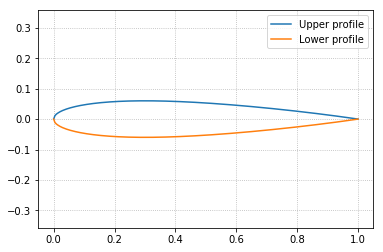

In [6]:
print('NACA digits for blade section "0": ', sample_blade.sections[0].digits)
print('Number of points used to generate blade sectional profile "1": ', sample_blade.sections[1].n_points)
print('Maximum thickness of the blade sectional profile "5": ', sample_blade.sections[5].max_thickness())
print('NACA digits and maximum camber of the blade sectional profile "3": ', sample_blade.sections[3].digits, sample_blade.sections[3].max_camber())

print('\nPlotting of the blade sectional profile "5"')
sample_blade.sections[5].plot()

Now in order to apply all the transformations corresponding to the `chord_length`, `pitch`, `rake`, `skew`, we execute the `apply_transformations` method. Such method has the `reflect` argument in case we prefer to reflect all the foils about the origin before applying the transformations. For this tutorial we set the `reflect` off.

In [7]:
sample_blade.apply_transformations(reflect=False)

Now we are ready to plot the final blade sectional profiles after all transformations

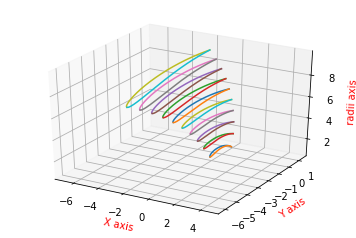

In [8]:
sample_blade.plot(outfile=None)

If we want to export a .ppg file that carries the information for the blade sections, then we execute the `export_ppg` method, specifying a valid string for the filename. Also the .ppg file will be generated with the following default values:

1. D_prop = 0.25 (for the propeller diameter)

1. D_hub = 0.075 (for the hub diameter)

1. n_blades = 5 (for the propeller number of blades)

1. params_normalized = False (to specify that the blade parameters are not normalized)

In [9]:
sample_blade.export_ppg(filename='data/data_out.ppg', D_prop=0.25, D_hub=0.075, n_blades=5, params_normalized=False)